In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from scipy.stats import linregress

# Census & gmaps API Keys
from config import (api_key, gkey)
c = Census(api_key, year=2020)

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Load the combined CSV file
combined_df = pd.read_csv("combined.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential,square_miles,pop_density
0,0,42,Pennsylvania,12794885,40.9,63627,35518,1480430,11.570483,2.745222,...,13.472963,0.001050,150700,4270226,8238,2.025491e+05,3.715775,13.64,46055.00,277.817501
1,1,6,California,39346023,36.7,78672,38576,4853434,12.335259,3.123769,...,13.409571,0.030414,362850,12542060,625476,1.576803e+07,5.128937,16.99,163696.00,240.360320
2,2,54,West Virginia,1807426,42.7,48037,27346,300152,16.606600,2.878735,...,12.860153,0.000000,95600,714719,499,1.122905e+04,3.786638,10.08,24038.00,75.190365
3,3,49,Utah,3151239,31.1,74197,30986,283360,8.992019,1.835119,...,13.952787,0.010257,208200,795526,11149,2.535065e+05,4.688451,10.88,84899.00,37.117504
4,4,36,New York,19514849,39.0,71117,40898,2581048,13.226072,2.923774,...,13.655858,0.001493,354650,6925678,52873,1.366822e+06,3.821709,18.54,54556.00,357.703076
5,5,11,District of Columbia,701974,34.1,90842,58659,103391,14.728608,4.172519,...,14.799600,0.006762,432800,240110,1833,4.590642e+04,3.984444,12.99,68.34,10271.788120
6,7,12,Florida,21216924,42.2,57703,32848,2772939,13.069468,2.621082,...,13.457360,0.006778,143100,7269480,140081,3.717083e+06,4.827880,11.58,65758.00,322.651601
7,8,45,South Carolina,5091517,39.7,54864,30727,726470,14.268243,2.660975,...,13.259044,0.001246,124900,1579901,4569,1.221164e+05,4.379648,12.57,32020.00,159.010525
8,9,38,North Dakota,760394,35.2,65315,36289,77491,10.190901,1.691360,...,13.599465,0.000357,126100,252332,273,5.715009e+03,3.735086,9.62,70705.00,10.754459
9,10,23,Maine,1340825,44.8,59489,33774,144384,10.768296,2.121231,...,13.692059,0.000000,167800,454650,457,9.935729e+03,3.601679,15.61,35385.00,37.892469


The r-value is: 0.1768940875778434


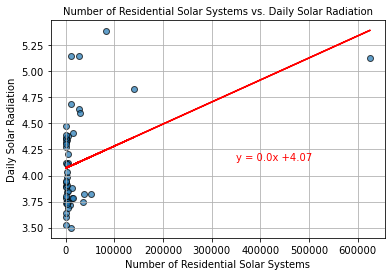

In [3]:
# Graph and linear regression on daily_solar_radiation.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["daily_solar_radiation"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Daily Solar Radiation")
plt.title(f"Number of Residential Solar Systems vs. Daily Solar Radiation", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

The r-value is: 0.05678170583330791


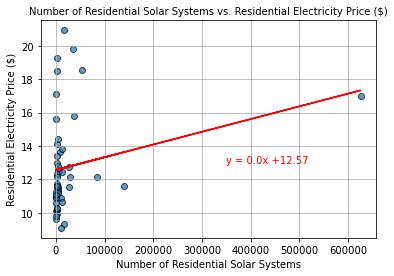

In [4]:
# Graph and linear regression on electricity_price_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["electricity_price_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Residential Electricity Price ($)")
plt.title(f"Number of Residential Solar Systems vs. Residential Electricity Price ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_electricity_price_residential.png")

# Show plot
plt.show()

The r-value is: 0.1098070823807276


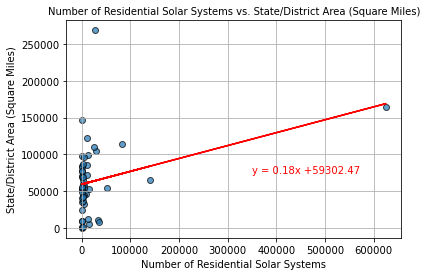

In [5]:
# Graph and linear regression on square_miles.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["square_miles"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 75000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("State/District Area (Square Miles)")
plt.title(f"Number of Residential Solar Systems vs. State/District Area (Square Miles)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_square_miles.png")

# Show plot
plt.show()

The r-value is: 0.00044710142906488804


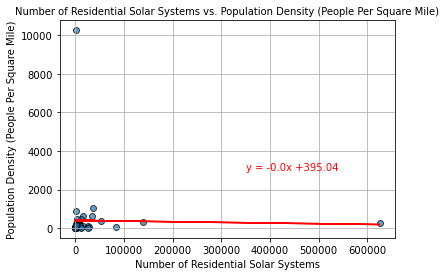

In [6]:
# Graph and linear regression on pop_density.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["pop_density"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population Density (People Per Square Mile)")
plt.title(f"Number of Residential Solar Systems vs. Population Density (People Per Square Mile)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_pop_density.png")

# Show plot
plt.show()

The r-value is: 0.5397707924536221


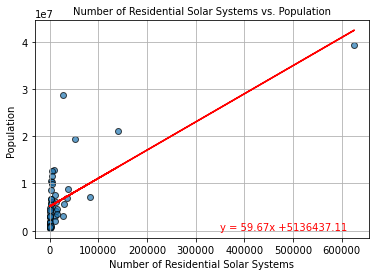

In [7]:
# Graph and linear regression on population.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Population"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 3000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Population ")
plt.title(f"Number of Residential Solar Systems vs. Population", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_population.png")

# Show plot
plt.show()

The r-value is: 0.006937545754935518


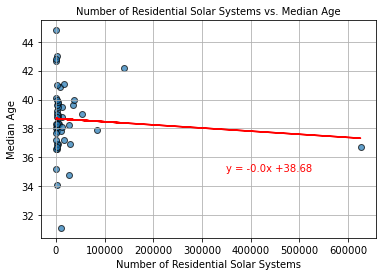

In [9]:
# Graph and linear regression on Median Age.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Median Age"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 35), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Age")
plt.title(f"Number of Residential Solar Systems vs. Median Age", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_median_age.png")

# Show plot
plt.show()

The r-value is: 0.04559796378630255


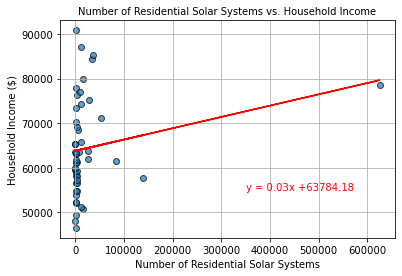

In [11]:
# Graph and linear regression on Household Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Household Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 55000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Household Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Household Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_household_income.png")

# Show plot
plt.show()

The r-value is: 0.01275742332664642


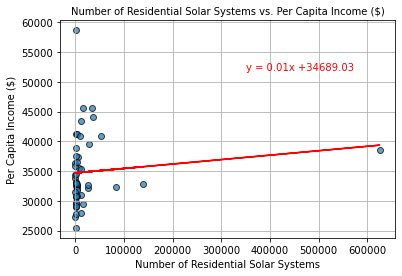

In [13]:
# Graph and linear regression on Per Capita Income.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income ($)")
plt.title(f"Number of Residential Solar Systems vs. Per Capita Income ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_per_capita_income.png")

# Show plot
plt.show()

The r-value is: 0.493225919667463


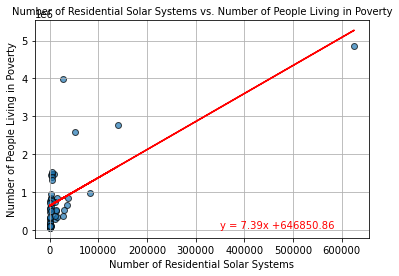

In [14]:
# Graph and linear regression on Poverty Count.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Count"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of People Living in Poverty")
plt.title(f"Number of Residential Solar Systems vs. Number of People Living in Poverty", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_count.png")

# Show plot
plt.show()

The r-value is: 9.775501879641065e-07


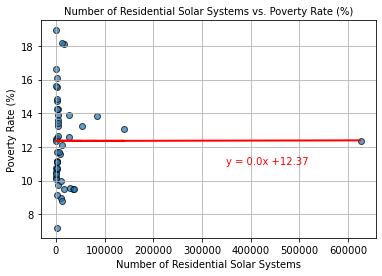

In [16]:
# Graph and linear regression on Poverty Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Poverty Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 11), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Poverty Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Poverty Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_poverty_rate.png")

# Show plot
plt.show()

The r-value is: 0.044184678811169005


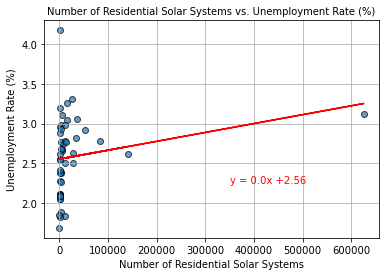

In [18]:
# Graph and linear regression on Unemployment Rate.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Unemployment Rate"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 2.25), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Unemployment Rate (%)")
plt.title(f"Number of Residential Solar Systems vs. Unemployment Rate (%)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_unemployment_rate.png")

# Show plot
plt.show()

The r-value is: 0.0009728861989492472


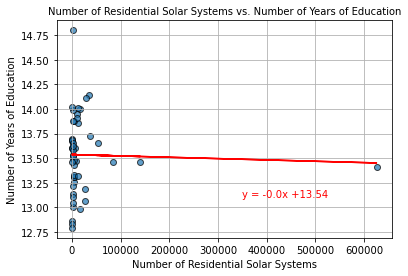

In [20]:
# Graph and linear regression on number_of_years_of_education.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_years_of_education"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 13.1), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Years of Education")
plt.title(f"Number of Residential Solar Systems vs. Number of Years of Education", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_years_of_education.png")

# Show plot
plt.show()

The r-value is: 0.4918163406481238


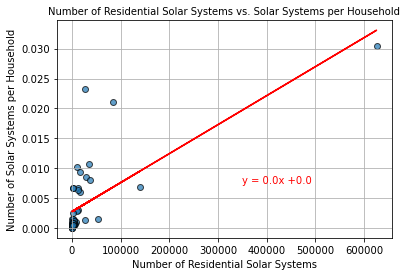

In [22]:
# Graph and linear regression on number_of_solar_system_per_household.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["number_of_solar_system_per_household"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, .0075), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Number of Solar Systems per Household")
plt.title(f"Number of Residential Solar Systems vs. Solar Systems per Household", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_number_of_solar_systems_per_household.png")

# Show plot
plt.show()

The r-value is: 0.14728438225662208


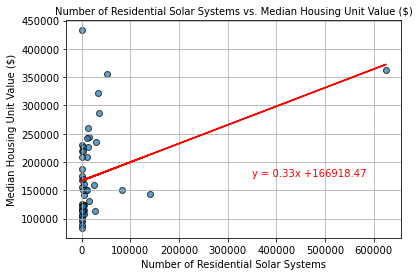

In [24]:
# Graph and linear regression on housing_unit_median_value.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["housing_unit_median_value"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 175000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Median Housing Unit Value ($)")
plt.title(f"Number of Residential Solar Systems vs. Median Housing Unit Value ($)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_housing_unit_median_value.png")

# Show plot
plt.show()

The r-value is: 0.9989311947097204


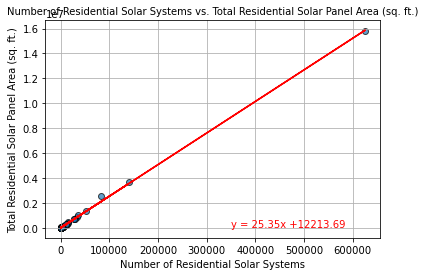

In [25]:
# Graph and linear regression on total_panel_area_residential.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["total_panel_area_residential"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 52000), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Total Residential Solar Panel Area (sq. ft.)")
plt.title(f"Number of Residential Solar Systems vs. Total Residential Solar Panel Area (sq. ft.)", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_total_panel_area_residential.png")

# Show plot
plt.show()